# Basic Health Areas in Madrid
> Now being used to impose restrictions due to Covid19 on people's movement and activities.

- toc: true 
- badges: true
- comments: true
- categories: [Madrid, Covid19]


In [ ]:
#hide
#from google.colab import drive
#drive.mount('/content/drive')
#%cd '/content/drive/My Drive/Colab Notebooks'

In [ ]:
#collapse-hide
#!pip install geopandas
#!apt-get install poppler-utils 
#!pip install pdf2image

In [ ]:
#collapse-hide
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

from PIL import Image

# Introduction to Zonas Básicas de Salud in the Comunidad de Madrid

## The Comunidad de Madrid provides information about and maps of the basic health areas

División territorial en zonas básicas de salud de la Comunidad de Madrid

https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_zonas_basicas_salud/resource/f1837bd3-a835-4110-9bbf-fae06c99b56b

'Shape' files of the basic health areas


In [ ]:
df=geopandas.read_file('./maps/zonas_basicas_salud.shp')
df.head()

codigo_geo  ...                                           geometry
0        001  ...  POLYGON ((439068.758 4470731.661, 439076.433 4...
1        002  ...  POLYGON ((439924.930 4472798.281, 439928.742 4...
2        003  ...  POLYGON ((443455.718 4472836.724, 443412.985 4...
3        004  ...  POLYGON ((440659.754 4473778.401, 440665.227 4...
4        005  ...  POLYGON ((452408.138 4484644.700, 452415.138 4...

[5 rows x 4 columns]

In [ ]:
df.columns

Index(['codigo_geo', 'pob_pad19', 'zona_basic', 'geometry'], dtype='object')

In [ ]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   codigo_geo  286 non-null    object  
 1   pob_pad19   286 non-null    int64   
 2   zona_basic  286 non-null    object  
 3   geometry    286 non-null    geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 9.1+ KB


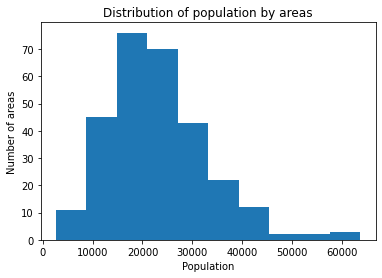

In [ ]:
plt.hist(df.pob_pad19)
plt.title('Distribution of population by areas')
plt.ylabel('Number of areas')
plt.xlabel('Population');

In [ ]:
df.describe()

pob_pad19
count    286.000000
mean   23298.580420
std     9935.956169
min     2636.000000
25%    16702.250000
50%    21829.000000
75%    28164.250000
max    63789.000000

In [ ]:
df[df.pob_pad19==df.pob_pad19.min()]

codigo_geo  ...                                           geometry
221        222  ...  POLYGON ((436250.375 4539098.529, 436255.925 4...

[1 rows x 4 columns]

In [ ]:
df[df.pob_pad19==df.pob_pad19.max()]

codigo_geo  ...                                           geometry
158        159  ...  POLYGON ((447970.223 4484559.958, 447972.423 4...

[1 rows x 4 columns]

There are 286 basic health zones, with an average population of around 23_000 people: the Rascafría area has only 2_636 people; the Mar Báltico area has 63_789 people.


In [ ]:
df["area"] = df['geometry'].area
df['pob_densidad'] = 100000*df.pob_pad19/df.area
df.head()

codigo_geo  pob_pad19  ...          area pob_densidad
0        001      30748  ...  1.572304e+06  1955.600930
1        002      19432  ...  7.741107e+05  2510.235189
2        003      29168  ...  8.528277e+05  3420.151457
3        004      21274  ...  5.452036e+05  3902.028813
4        005      29001  ...  3.513729e+07    82.536255

[5 rows x 6 columns]

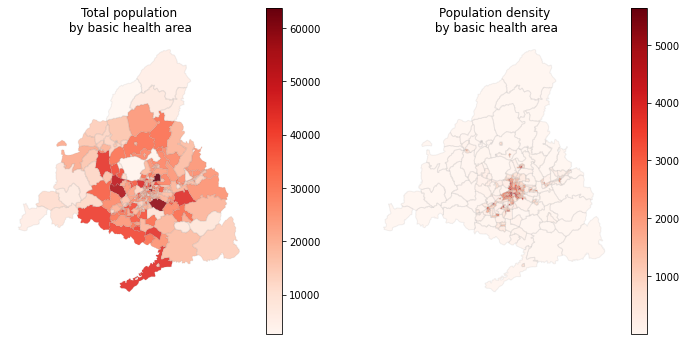

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))

df.plot(ax=ax1, column=df.pob_pad19, cmap='Reds', legend=True)
df.plot(ax=ax1, color='white', edgecolor='grey', alpha=0.1)
ax1.set_title('Total population\n by basic health area')
ax1.axis('off')

df.plot(ax=ax2, column=df.pob_densidad, cmap='Reds', legend=True)
df.plot(ax=ax2, color='white', edgecolor='grey', alpha=0.1)
ax2.set_title('Population density\n by basic health area')
ax2.axis('off');

In [ ]:
df[df.pob_densidad==df.pob_densidad.min()]

codigo_geo  pob_pad19  ...          area pob_densidad
221        222       2636  ...  2.581206e+08     1.021228

[1 rows x 6 columns]

In [ ]:
df[df.pob_densidad==df.pob_densidad.max()]

codigo_geo  pob_pad19  ...           area pob_densidad
160        161      17331  ...  307034.469165  5644.643107

[1 rows x 6 columns]

## Mapas de Zonas Básicas de Salud del Área Única de la Comunidad de Madrid

https://www.madrid.org/iestadis/fijas/estructu/general/territorio/estructucartemzbs.htm

(maps have been downloaded and stored in `./maps/...`)

https://www.madrid.org/iestadis/fijas/estructu/general/territorio/descarga/zbs13_mar_baltico.pdf

In [ ]:
#collapse-hide
# Convert downloaded map from .pdf to .png 

#convert_from_path('./maps/zbs13_mar_baltico.pdf')[0].save('./maps/159_mar_baltico.png', dpi=(300,300))
#convert_from_path('./maps/zbs13_rascafria.pdf')[0].save('./maps/222_rascafria.png', dpi=(300,300))
#convert_from_path('./maps/zbs13_martin_de_vargas.pdf')[0].save('./maps/161_martin_de_vargas.png', dpi=(300,300))

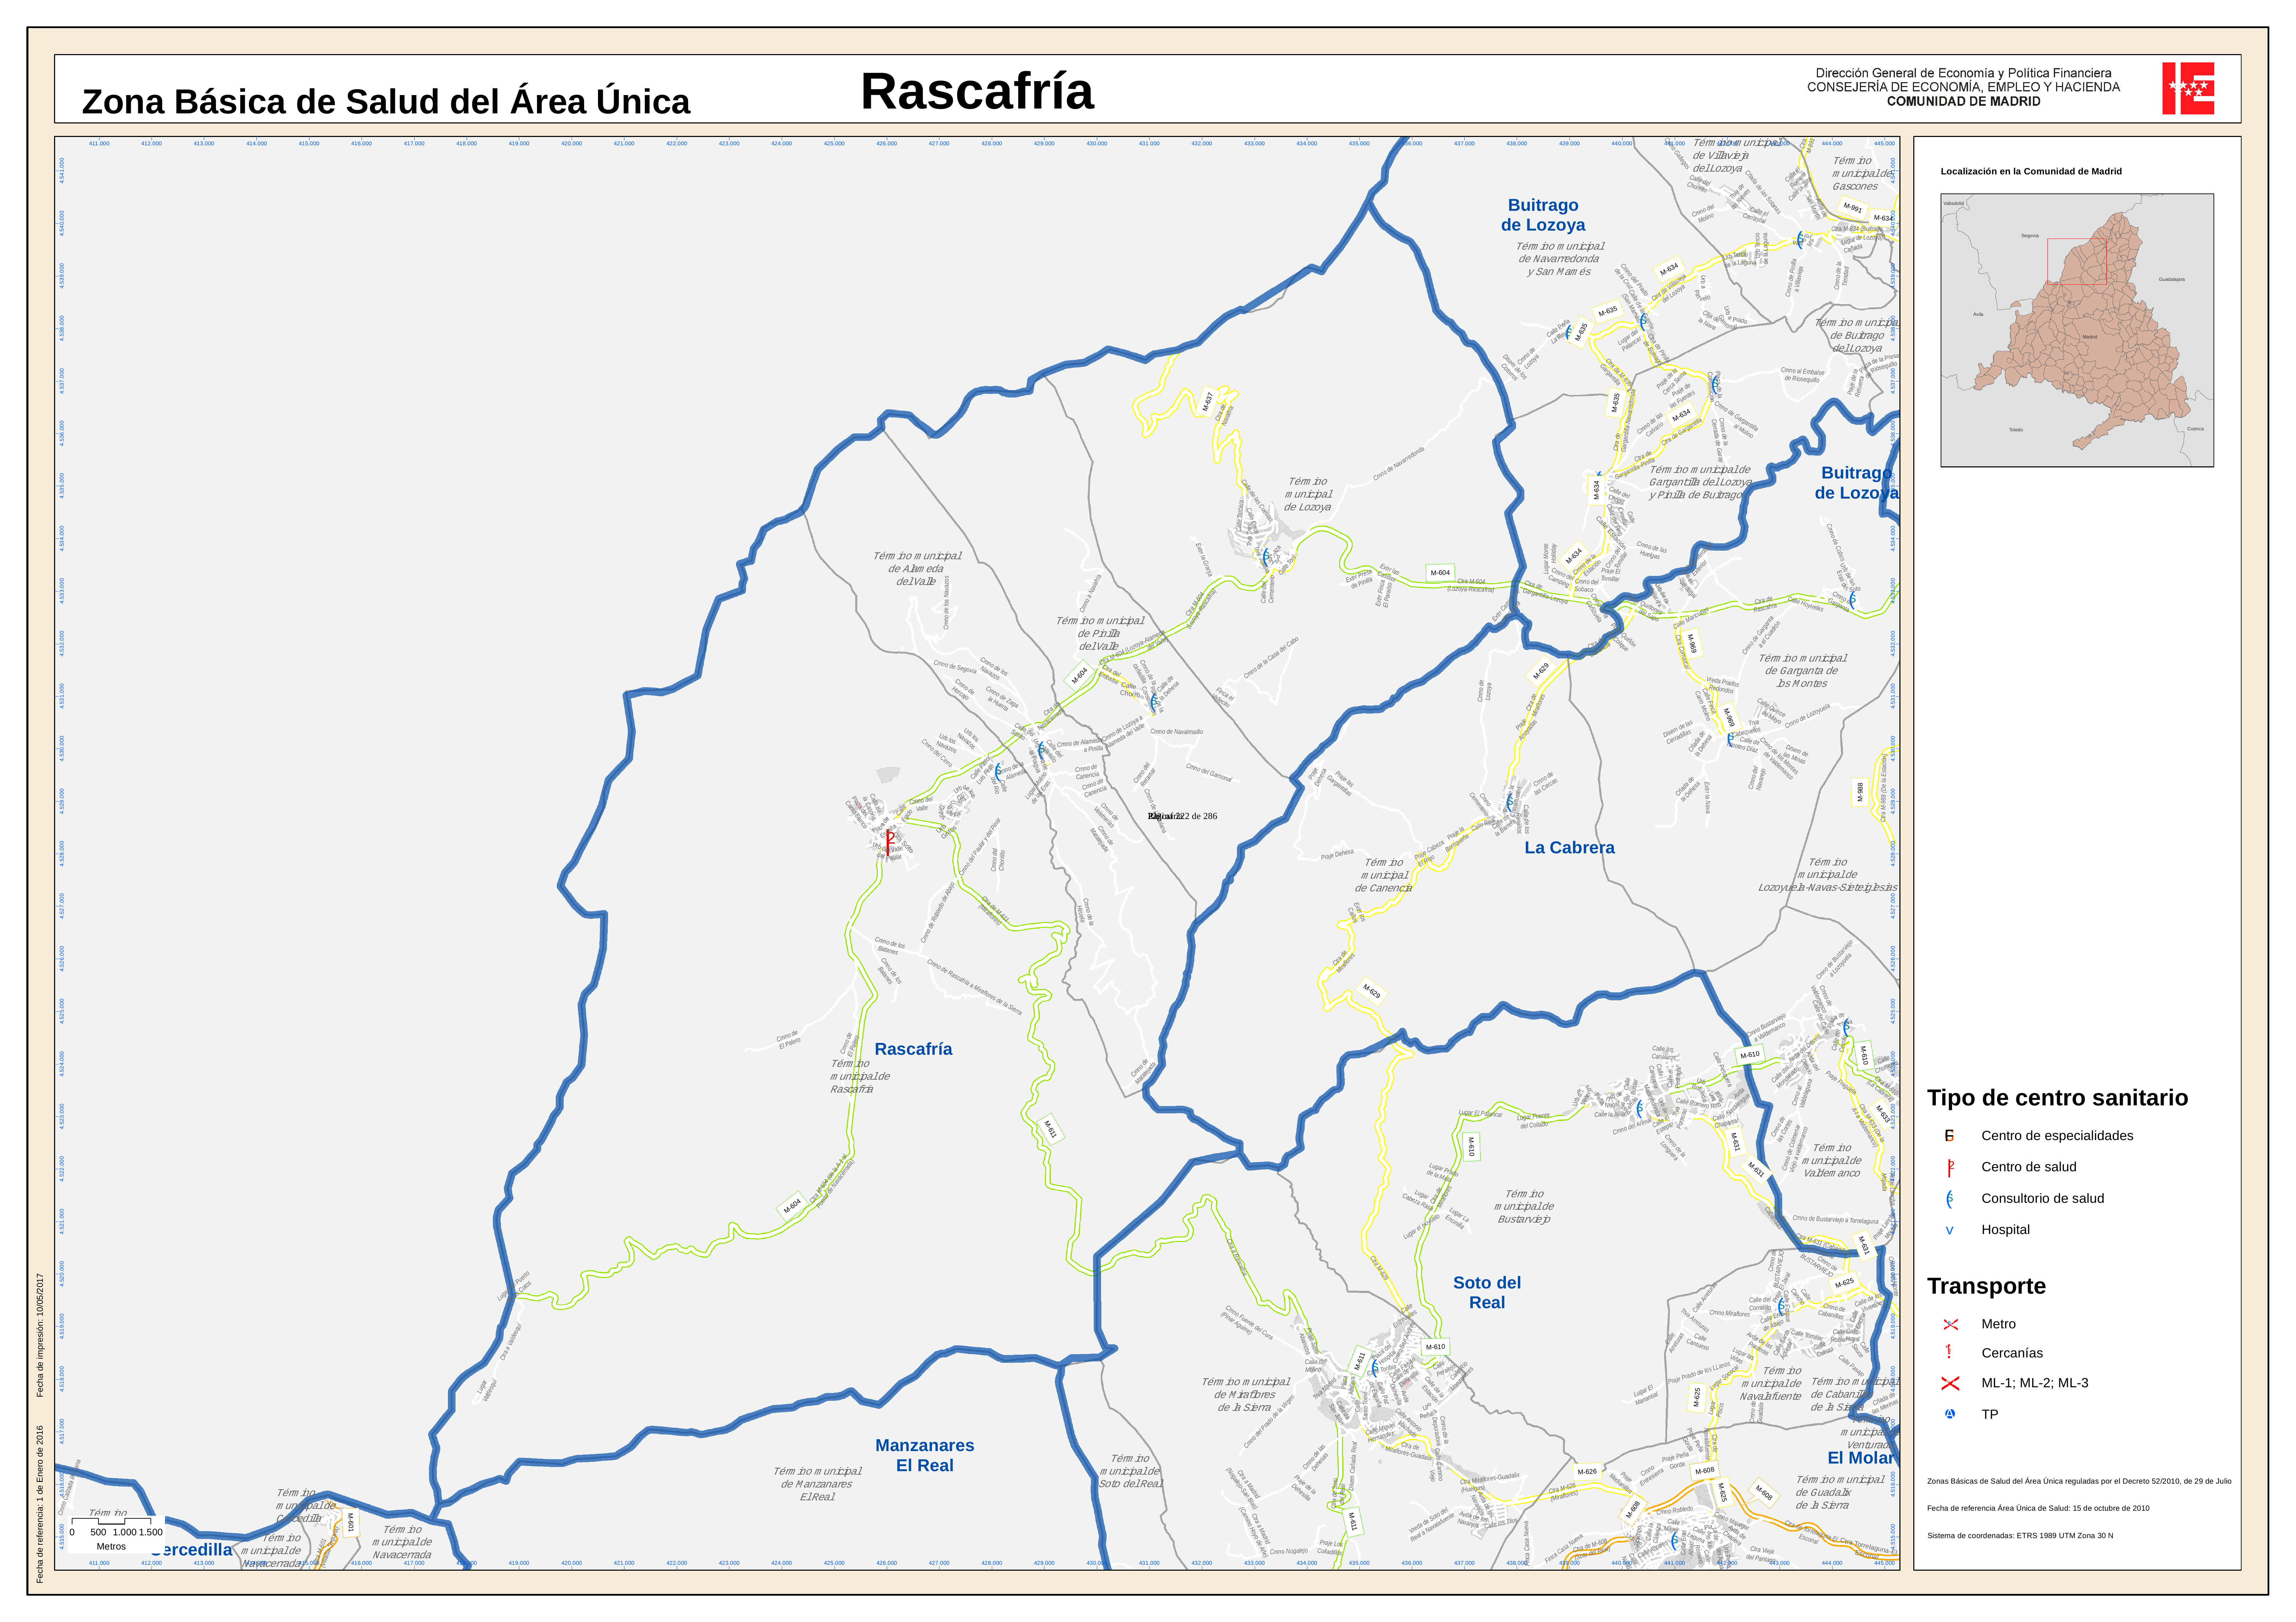

In [ ]:
Image.open('./maps/222_rascafria.png')